In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=10
paper='1106.6060'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let me analyze the Hamiltonian equation for the Hartree-Fock class implementation. I need to identify the flavors, basis order, interacting and non-interacting terms.

First, let's identify the flavors and basis order:

From the provided Hamiltonian, I see that $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$. This indicates:
1. We have 3 orbital types: p_x, p_y, and d 
2. Each has a spin index s, which is typically up and down (↑ and ↓)

So our flavors are: orbital (3 types) and spin (2 types).

The Hamiltonian matrix $\HH_{\kk s}$ is 3x3, corresponding to the three orbitals. The spin index s suggests we have separate Hamiltonians for each spin.

Therefore:
- D = (2, 3) for (spin, orbital)
- Basis order: 
  - Spin: up (0), down (1)
  - Orbital: p_x (0), p_y (1), d (2)

Next, let's identify the terms that depend on expectation values (EXP-VAL DEPENDENT TERMS):

From the equations, 

In [7]:
print(generated_code['thinking'])

Let me analyze the Hamiltonian equation for the Hartree-Fock class implementation. I need to identify the flavors, basis order, interacting and non-interacting terms.

First, let's identify the flavors and basis order:

From the provided Hamiltonian, I see that $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$. This indicates:
1. We have 3 orbital types: p_x, p_y, and d 
2. Each has a spin index s, which is typically up and down (↑ and ↓)

So our flavors are: orbital (3 types) and spin (2 types).

The Hamiltonian matrix $\HH_{\kk s}$ is 3x3, corresponding to the three orbitals. The spin index s suggests we have separate Hamiltonians for each spin.

Therefore:
- D = (2, 3) for (spin, orbital)
- Basis order: 
  - Spin: up (0), down (1)
  - Orbital: p_x (0), p_y (1), d (2)

Next, let's identify the terms that depend on expectation values (EXP-VAL DEPENDENT TERMS):

From the equations, I can see several terms that depend on expectation va

In [8]:
print(generated_code['text'])

# ANSWER:

1) Number of Flavors, D = (2, 3)
Basis Order:
0: spin. Order: up, down
1: orbital. Order: p_x, p_y, d

2) EXP-VAL DEPENDENT TERMS: {
   "n^p": "Total density of holes on oxygen sites: sum of p_x and p_y occupations across both spins",
   "η (eta)": "Nematic order parameter: difference between p_x and p_y orbital occupations",
   "n": "Total density of holes: sum of all orbital occupations"
}

TERMS:
- γ_1(k_x) = -2t_{pd}cos(k_x/2) -> H[s, 0, s, 2, k] and H[s, 2, s, 0, k], NI
- γ_1(k_y) = -2t_{pd}cos(k_y/2) -> H[s, 1, s, 2, k] and H[s, 2, s, 1, k], NI
- γ_2(k) = -4t_{pp}cos(k_x/2)cos(k_y/2) -> H[s, 0, s, 1, k] and H[s, 1, s, 0, k], NI
- ξ_x = Δ + Ũ_p·n^p/4 - Ṽ_pp·η/4 - μ -> H[s, 0, s, 0, k], I
- ξ_y = Δ + Ũ_p·n^p/4 + Ṽ_pp·η/4 - μ -> H[s, 1, s, 1, k], I
- ξ_d = Ũ_d·(n-n^p)/2 - μ -> H[s, 2, s, 2, k], I
- f(n^p, η) = constant energy shift, I

3) CODE:
```python
import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
  """
  Hartree-Fock Hamilton

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
  """
  Hartree-Fock Hamiltonian for a three-orbital (p_x, p_y, d) model on a square lattice.
  
  Args:
    N_shell: Number of shells in the Brillouin zone
    parameters: Dictionary containing model parameters
    filling_factor: Filling factor of the system (default: 0.5)
  """
  def __init__(self, N_shell: int, parameters: dict[str, Any]={
      't_pd': 1.0,      # p-d hopping parameter
      't_pp': 0.5,      # p-p hopping parameter
      'Delta': 1.0,     # Energy level of p orbitals relative to d
      'U_p': 3.0,       # On-site Coulomb repulsion for p orbitals
      'U_d': 5.0,       # On-site Coulomb repulsion for d orbitals
      'V_pp': 1.0,      # Inter-site interaction between p orbitals
      'V_pd': 1.0,      # Inter-site interaction between p and d orbitals
      'T': 0,           # Temperature
      'a': 1.0          # Lattice constant
    }, filling_factor: float=0.5):
    
    

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_1106_6060_10.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

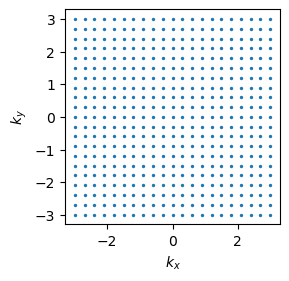

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,parameters={'Delta':0,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

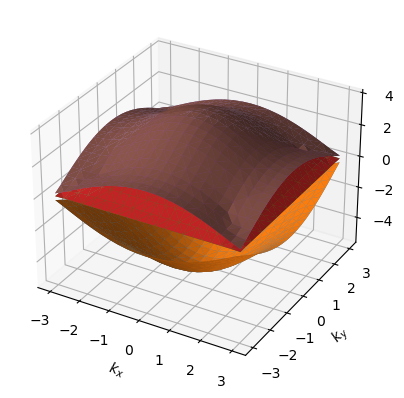

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

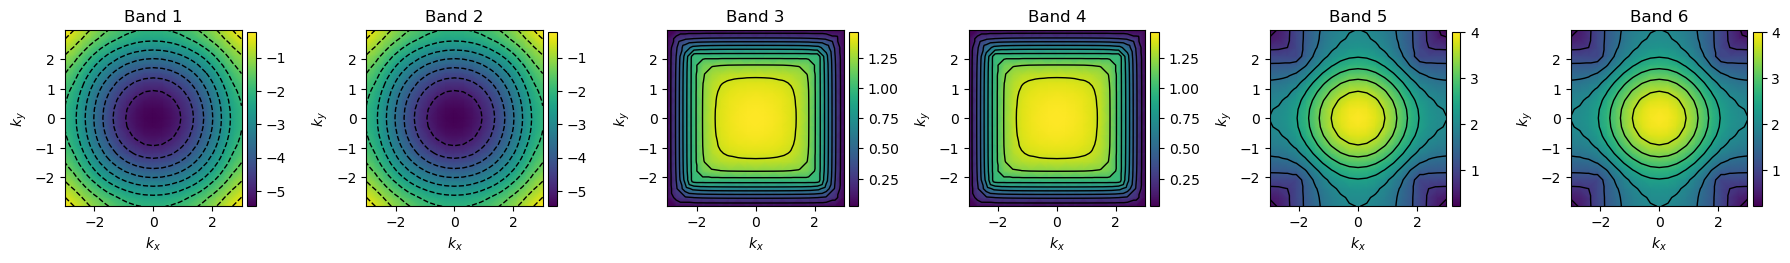

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  
parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [25]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 3


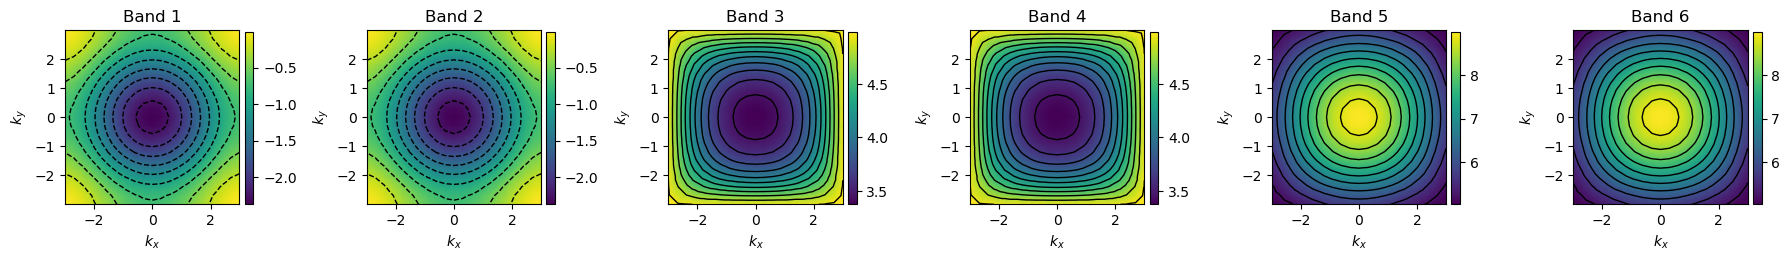

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [28]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[:,2,:,2,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 2


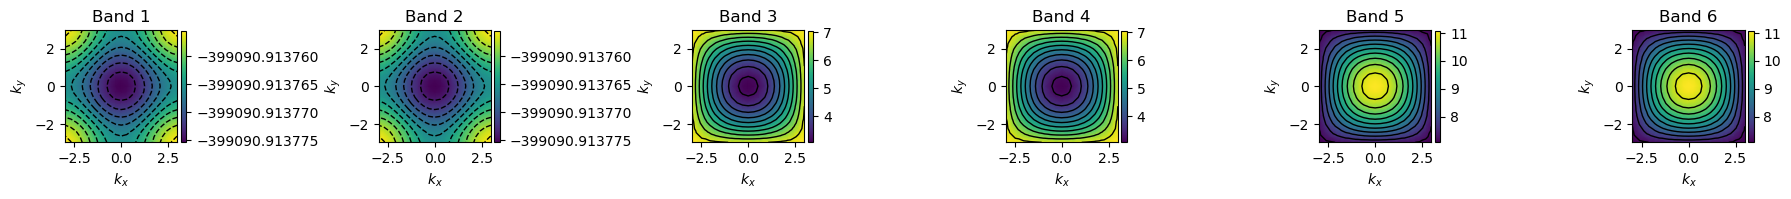

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is 399093.97
U/T is 67288.15
mean_U is 31199.43


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

I need to evaluate the image based on the rubric, which asks me to check if the image shows a momentum space mesh in the first Brillouin zone of the problem and to check the point group symmetry.

Let's examine what's in the image:

1. The image shows a 2D grid of dots (blue points) in the $k_x$-$k_y$ plane.
2. The range of both $k_x$ and $k_y$ is approximately from -3 to 3.
3. The points appear to be evenly spaced in a square grid.

Now, let's check against the rubric requirements:

First, is this a momentum space mesh in the first Brillouin zone?
- The image shows a mesh in momentum (k) space, as indicated by the axes labeled $k_x$ and $k_y$.
- For a square lattice, the first Brillouin zone is a square in k-space, centered at the origin, with boundaries at $k_x, k_y = \pm \pi$.
- The image shows a square region from approximately -3 to 3 in both $k_x$ and $k_y$.

If we assume the units are in terms of the reciprocal lattice constan

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the provided image that shows band structure plots for 6 different bands (Band 1 through Band 6) in the first Brillouin zone. I'll evaluate this according to the given rubric.

1. Identifying the shape of the Brillouin zone boundary:
   From the image, I can see that each plot shows a square region with k_x and k_y axes ranging from approximately -3 to 3. The Brillouin zone appears to be square-shaped, which is consistent with what we expect for a square lattice. This matches the lattice type mentioned in the problem (LATTICE: square).

2. Examining the symmetry of the energy distribution:

   2.1 Highest energy regions (yellow):
   - Bands 1-2: The highest energy (least negative) regions are at the edges (yellow).
   - Bands 3-4: The highest energy regions form square-shaped yellow areas in the center.
   - Bands 5-6: The highest energy regions are circular/oval yellow areas in the center.

   2.2 Pattern of energy va

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper)
    )


#################### THINKING ####################

This image shows a set of 6 false color plots labeled as Band 1 through Band 6, representing the interacting-renormalized band structure in the first Brillouin zone after a self-consistent Hartree-Fock calculation.

Let me analyze this according to the rubric:

1. Identify the shape of the Brillouin zone boundary:
The plots show a square-shaped Brillouin zone, with k_x and k_y axes ranging from approximately -2 to 2. This is consistent with what's expected for a square lattice, which should have a square first Brillouin zone. ✓ Correct

2. Examine the symmetry of the energy distribution:

2.1 Highest energy regions (yellow):
- Bands 1 & 2: The highest energies are at the corners of the Brillouin zone
- Bands 3 & 4: The highest energies are at the edges of the Brillouin zone
- Bands 5 & 6: The highest energies are at the center of the Brillouin zone (k_x = 0, k_y = 0)

2.2 Pattern of energy variation:
- Bands 1 & 2 show concentric pat

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='4*V_pd = 4e5')
    )


#################### THINKING ####################

Let me analyze this image based on the rubric:

1. Identify the shape of the Brillouin zone boundary:
Looking at all 6 band plots, I can see that the Brillouin zone shown is square-shaped, with axes labeled kx and ky ranging from approximately -2.5 to 2.5. This is consistent with a square lattice, which would have a square-shaped first Brillouin zone.

2. Examine the symmetry of the energy distribution:

2.1 Highest energy regions (yellow):
- In bands 1-4, the highest energy regions appear to be at the edges of the Brillouin zone
- In bands 5-6, the highest energy regions (yellow) are clearly at the center of the Brillouin zone

2.2 Pattern of energy variation:
- Bands 1 and 2 show concentric contours with energy decreasing radially from the center
- Bands 3 and 4 also show concentric contours but with different energy scales
- Bands 5 and 6 show a pattern with the highest energy at the center (Γ point)

2.3 Rotational symmetries:
Fo

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '10' saved to final_answer.yaml
